# Deteksi Komunitas User pada Topik #PercumaLaporPolisi di Jejaring Sosial Twitter Menggunakan Louvain Method

Dendy Andra A.N - 1301184280 <br>
Thomi Ridho Al Farid - 1301180226

In [1]:
import pandas as pd
import networkx as nx
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import communities
import community as community_louvain
import nltk
import Sastrawi
import re
import string
import ast
# nltk.download('punkt')

## Load Dataset

In [2]:
data = pd.read_csv('tweet data - #PercumaLaporPolisi.csv')
data.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1447713621182582785,jigrek,RT @siputriwidi: Pembuktian pemerkosaan tidak ...,Mon Oct 11 23:59:59 +0000 2021,12/10/2021 00:59:59,NaN,NaN,NaN,NaN,197675032,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1437774087...,247.0,323.0,middle earth,http://twitter.com/jigrek/statuses/14477136211...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1447713594024415237,shellydevina,RT @audhinafh: This tweet is a perfect of embo...,Mon Oct 11 23:59:52 +0000 2021,12/10/2021 00:59:52,NaN,NaN,NaN,NaN,159732495,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1075154219...,447.0,633.0,"Gresik, Indonesia",http://twitter.com/shellydevina/statuses/14477...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2,1447713583324753920,RevyHA,RT @B51_Siluman: Melihat cuplikan pak Junior T...,Mon Oct 11 23:59:50 +0000 2021,12/10/2021 00:59:50,NaN,NaN,NaN,NaN,540637861,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1408212470...,370.0,231.0,"Gunung Putri, Indonesia",http://twitter.com/RevyHA/statuses/14477135833...,"{""hashtags"":[{""text"":""PolriSesuaiProsedur"",""in..."
3,1447713562709741570,Jarpoel_,RT @BaharrudinPrb12: Saling balas tagar #Percu...,Mon Oct 11 23:59:45 +0000 2021,12/10/2021 00:59:45,NaN,NaN,NaN,NaN,398646917,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1254437285...,419.0,697.0,"Jakarta Selatan, DKI Jakarta",http://twitter.com/Jarpoel_/statuses/144771356...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
4,1447713530073866241,jen_s_pov,RT @remotivi: Sepotong surat untuk polisi dari...,Mon Oct 11 23:59:37 +0000 2021,12/10/2021 00:59:37,NaN,NaN,NaN,NaN,1257908254417416193,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1443279067...,160.0,319.0,"Tsushima-shi, Nagasaki",http://twitter.com/jen_s_pov/statuses/14477135...,"{""hashtags"":[{""text"":""MejaRedaksi"",""indices"":[..."


In [43]:
print(data[data.from_user == 'remotivi'].text.values)

['RT @aulianastiti: Halo @DivHumas_Polri kl mau menunjukkan ke publik bhw ga #PercumaLaporPolisi, bisa perhatikan baik2 pesan dari @remotivi ini.\n\nFokus sama tugasmu menindak pemerkosa, bukan membungkam media — apalagi memojokkan korban. https://t.co/Uu8rgJug2I https://t.co/BA1leH3HSx']


## Exploratory Data Analysis
Analisa dataset yang digunakan

In [4]:
data.describe(include='all')

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
count,2.970000e+03,2970,2970,2970,2970,0.0,0.0,3.410000e+02,341,2.970000e+03,3.380000e+02,2970,2970,2.897000e+03,2950.000000,1924,2970,2970
unique,NaN,2405,964,2880,2880,NaN,NaN,NaN,124,NaN,NaN,18,2381,NaN,NaN,973,2970,878
top,NaN,ahmagun13,RT @secgron: Bedain media dan web pribadi aja ...,Mon Oct 11 10:24:38 +0000 2021,11/10/2021 17:14:22,NaN,NaN,NaN,M1_nusaputra,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,Indonesia,http://twitter.com/van_harlend/statuses/144753...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
freq,NaN,25,336,2,2,NaN,NaN,NaN,62,NaN,NaN,2111,43,NaN,NaN,193,1,336
mean,1.447581e+18,NaN,NaN,NaN,NaN,NaN,NaN,6.601000e+17,NaN,4.214857e+17,1.447451e+18,NaN,NaN,2.336449e+04,631.298305,NaN,NaN,NaN
std,7.271523e+13,NaN,NaN,NaN,NaN,NaN,NaN,6.236271e+17,NaN,5.683559e+17,2.320858e+14,NaN,NaN,5.234325e+05,956.726714,NaN,NaN,NaN
min,1.447468e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.546583e+07,NaN,9.221962e+06,1.445938e+18,NaN,NaN,1.000000e+00,1.000000,NaN,NaN,NaN
25%,1.447520e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.241716e+08,NaN,2.070024e+08,1.447421e+18,NaN,NaN,1.050000e+02,180.000000,NaN,NaN,NaN
50%,1.447579e+18,NaN,NaN,NaN,NaN,NaN,NaN,9.018823e+17,NaN,1.043511e+09,1.447513e+18,NaN,NaN,3.070000e+02,370.000000,NaN,NaN,NaN
75%,1.447625e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.303348e+18,NaN,1.077348e+18,1.447555e+18,NaN,NaN,6.790000e+02,700.750000,NaN,NaN,NaN


## Preprocessing Data

In [5]:
data.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1447713621182582785,jigrek,RT @siputriwidi: Pembuktian pemerkosaan tidak ...,Mon Oct 11 23:59:59 +0000 2021,12/10/2021 00:59:59,NaN,NaN,NaN,NaN,197675032,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1437774087...,247.0,323.0,middle earth,http://twitter.com/jigrek/statuses/14477136211...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1447713594024415237,shellydevina,RT @audhinafh: This tweet is a perfect of embo...,Mon Oct 11 23:59:52 +0000 2021,12/10/2021 00:59:52,NaN,NaN,NaN,NaN,159732495,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1075154219...,447.0,633.0,"Gresik, Indonesia",http://twitter.com/shellydevina/statuses/14477...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2,1447713583324753920,RevyHA,RT @B51_Siluman: Melihat cuplikan pak Junior T...,Mon Oct 11 23:59:50 +0000 2021,12/10/2021 00:59:50,NaN,NaN,NaN,NaN,540637861,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1408212470...,370.0,231.0,"Gunung Putri, Indonesia",http://twitter.com/RevyHA/statuses/14477135833...,"{""hashtags"":[{""text"":""PolriSesuaiProsedur"",""in..."
3,1447713562709741570,Jarpoel_,RT @BaharrudinPrb12: Saling balas tagar #Percu...,Mon Oct 11 23:59:45 +0000 2021,12/10/2021 00:59:45,NaN,NaN,NaN,NaN,398646917,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1254437285...,419.0,697.0,"Jakarta Selatan, DKI Jakarta",http://twitter.com/Jarpoel_/statuses/144771356...,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
4,1447713530073866241,jen_s_pov,RT @remotivi: Sepotong surat untuk polisi dari...,Mon Oct 11 23:59:37 +0000 2021,12/10/2021 00:59:37,NaN,NaN,NaN,NaN,1257908254417416193,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1443279067...,160.0,319.0,"Tsushima-shi, Nagasaki",http://twitter.com/jen_s_pov/statuses/14477135...,"{""hashtags"":[{""text"":""MejaRedaksi"",""indices"":[..."


In [6]:
data[data.from_user.isin(['jigrek'])]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1447713621182582785,jigrek,RT @siputriwidi: Pembuktian pemerkosaan tidak ...,Mon Oct 11 23:59:59 +0000 2021,12/10/2021 00:59:59,NaN,NaN,NaN,NaN,197675032,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1437774087...,247.0,323.0,middle earth,http://twitter.com/jigrek/statuses/14477136211...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_str                     2970 non-null   int64  
 1   from_user                  2970 non-null   object 
 2   text                       2970 non-null   object 
 3   created_at                 2970 non-null   object 
 4   time                       2970 non-null   object 
 5   geo_coordinates            0 non-null      float64
 6   user_lang                  0 non-null      float64
 7   in_reply_to_user_id_str    341 non-null    float64
 8   in_reply_to_screen_name    341 non-null    object 
 9   from_user_id_str           2970 non-null   int64  
 10  in_reply_to_status_id_str  338 non-null    float64
 11  source                     2970 non-null   object 
 12  profile_image_url          2970 non-null   object 
 13  user_followers_count       2897 non-null   float

### Drop kolom
Menghilangkan kolom yang tidak digunakan

In [9]:
df.drop(
    ['created_at', 
     'time',
     'geo_coordinates', 
     'user_lang', 
     'source', 
     'profile_image_url', 
     'user_location', 
     'status_url',
     'in_reply_to_status_id_str',
     'in_reply_to_user_id_str',
     'from_user_id_str',     
     'in_reply_to_user_id_str',
     'user_followers_count',
     'user_friends_count',
     'id_str'
    ], 
    axis=1, 
    inplace=True)


In [10]:
df.shape

(2970, 4)

### Menambah data retweet yang tidak ada di df

In [11]:
# tambah data retweet yang tidak ada di df
existed_node = list(df['from_user'].unique())
counter = 0
for i in range(len(df['text'])):
    existed_node = list(df['from_user'].unique())
    tweetText = df.text.iloc[i]
    tweetText = tweetText.split()
    if tweetText[0] == 'RT': #check if text is retweet
        del tweetText[0]
        user_tmp = tweetText[0]
        user_tmp = re.sub("[@:]","",user_tmp) #Remove mention (@) and :
        if not user_tmp in existed_node:
            counter += 1
            del tweetText[0]
            tweetText = " ".join(word for word in tweetText)
            new_tweet = {'from_user': user_tmp, 'text':tweetText}
            df = df.append(new_tweet, ignore_index=True)
        else:
            continue
    else:
        continue
print(counter)

77


### Membersihkan teks tweet

In [12]:
df.head()

,from_user,text,in_reply_to_screen_name,entities_str
0,jigrek,RT @siputriwidi: Pembuktian pemerkosaan tidak ...,NaN,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,shellydevina,RT @audhinafh: This tweet is a perfect of embo...,NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2,RevyHA,RT @B51_Siluman: Melihat cuplikan pak Junior T...,NaN,"{""hashtags"":[{""text"":""PolriSesuaiProsedur"",""in..."
3,Jarpoel_,RT @BaharrudinPrb12: Saling balas tagar #Percu...,NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
4,jen_s_pov,RT @remotivi: Sepotong surat untuk polisi dari...,NaN,"{""hashtags"":[{""text"":""MejaRedaksi"",""indices"":[..."


In [13]:
def tweet_cleaner(tweetText):
    tweetText = tweetText.lower()
    tweetText = re.sub("@[A-Za-z0-9]+","",tweetText) #Remove mention (@)
    tweetText = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweetText) #Remove links
    tweetText = " ".join(tweetText.split())    
    tweetText = re.sub("#[A-Za-z0-9_]+","", tweetText) #Remove hashtag
    tweetText = re.sub('[()!?]', ' ', tweetText) # Remove punctuations
    tweetText = re.sub('\[.*?\]',' ', tweetText) # Remove punctuations
    tweetText = re.sub("[^a-z0-9]"," ", tweetText)
    tweetText = tweetText.split()
    if len(tweetText) == 0: # if no tweet text
        tweetText = None
    else:
        if tweetText[0] == 'rt': #check if text is retweet
            del tweetText[0]
        tweetText = " ".join(word for word in tweetText)
    return tweetText

In [14]:
df['text'] = df['text'].map(lambda x: tweet_cleaner(x))

In [15]:
df.describe()

,from_user,text,in_reply_to_screen_name,entities_str
count,3047,2879,341,2970
unique,2482,777,124,878
top,ahmagun13,bedain media dan web pribadi aja ga bisa emang...,M1_nusaputra,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
freq,25,337,62,336


In [16]:
df.isna().sum()

from_user                     0
text                        168
in_reply_to_screen_name    2706
entities_str                 77
dtype: int64

In [17]:
df[df.text.isna()]

,from_user,text,in_reply_to_screen_name,entities_str
73,hend_susandi,None,KompasTV,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
138,DeeGtal1,None,KompasTV,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
146,akunrec09153247,None,KompasTV,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
167,sopimanyawa,None,KompasTV,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
230,fajarws11,None,NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
...,...,...,...,...
3005,_mardial_,None,NaN,NaN
3014,mere_twat,None,NaN,NaN
3019,xDAULx,None,NaN,NaN
3036,ffarliani,None,NaN,NaN


### Drop null text

In [18]:
df.dropna(subset=['text'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 3046
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   from_user                2879 non-null   object
 1   text                     2879 non-null   object
 2   in_reply_to_screen_name  271 non-null    object
 3   entities_str             2813 non-null   object
dtypes: object(4)
memory usage: 112.5+ KB


### Stopword Removal

In [19]:
# from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [20]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

for i in range(len(df['text'])):    
    text_tmp = stopword.remove(df.text.iloc[i])
    df.text.iloc[i] = text_tmp

In [21]:
df.text.iloc[4]

'sepotong surat polisi remotivi sudah berusaha menulis sesingkat singkatnya pembaca malas tetap mengerti wujud perhatian kepada polisi stigma anda benahi'

### Stemming

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [23]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i in range(len(df['text'])):        
    text_tmp = stemmer.stem(df.text.iloc[i])
    df.text.iloc[i] = text_tmp

In [24]:
df.text.iloc[4]

'potong surat polisi remotivi sudah usaha tulis singkat singkat baca malas tetap erti wujud perhati kepada polisi stigma anda benah'

### Tokenizing

In [25]:
from nltk.tokenize import word_tokenize 

In [26]:
for i in range(len(df['text'])):        
    tokens = word_tokenize(df.text.iloc[i])   
    df.text.iloc[i] = tokens

In [27]:
idx = df[df['text'].str.len() == 0].index
df[df['text'].str.len() == 0]

,from_user,text,in_reply_to_screen_name,entities_str
53,psytrophxc,[],NaN,"{""hashtags"":[{""text"":""percumalaporpolisi"",""ind..."
64,Serterah,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
65,Oyasumio30,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
92,bundabalqisabel,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
102,sannigos,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
...,...,...,...,...
2954,jjicrew,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2960,lazirhaf03,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2964,cyncynnati,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2966,neegouy,[],NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."


In [28]:
df.drop(idx, inplace=True)
df.shape

(2587, 4)

In [29]:
type(df.text.iloc[0])

list

In [3]:
# df.to_csv('tweet-#PercumaLaporPolisi-Tokenize.csv', index=False)
df = pd.read_csv('tweet-#PercumaLaporPolisi-Tokenize.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.shape

(2587, 4)

## Membangun Graph

In [5]:
df.head()

,from_user,text,in_reply_to_screen_name,entities_str
0,jigrek,"['bukti', 'perkosa', 'cuma', 'visum', 'plus', ...",NaN,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,shellydevina,"['this', 'tweet', 'is', 'a', 'perfect', 'of', ...",NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
2,RevyHA,"['siluman', 'lihat', 'cuplik', 'pak', 'junior'...",NaN,"{""hashtags"":[{""text"":""PolriSesuaiProsedur"",""in..."
3,Jarpoel_,"['saling', 'balas', 'tagar', 'vs', 'sini', 'aj...",NaN,"{""hashtags"":[{""text"":""PercumaLaporPolisi"",""ind..."
4,jen_s_pov,"['potong', 'surat', 'polisi', 'remotivi', 'sud...",NaN,"{""hashtags"":[{""text"":""MejaRedaksi"",""indices"":[..."


### Membuat list nodes

In [6]:
# ekstrak info user yang di mention di tweet / retweet di kolom entity
nodes_mention = []
for i in range(len(df['entities_str'])):
    if not pd.isna(df['entities_str'].iloc[i]):            
        user_entity = json.loads(df['entities_str'].iloc[i])        
        user_mention = user_entity['user_mentions']
        if len(user_mention) != 0:            
            res = dict(user_mention[0])
            scr_name = res['screen_name']
            nodes_mention.append(scr_name)
        else:
            nodes_mention.append(None)

df['user_mentioned'] = pd.Series(nodes_mention)
df.drop(['entities_str'], axis=1, inplace=True)

In [7]:
df.describe(include='all')

,from_user,text,in_reply_to_screen_name,user_mentioned
count,2587,2587,271,2117
unique,2077,775,108,234
top,ahmagun13,"['bedain', 'media', 'web', 'pribadi', 'aja', '...",M1_nusaputra,mardiasih
freq,17,337,62,378


In [8]:
nodes_from_user = list(df['from_user'].unique())
nodes_in_reply_to_screen_name = list(df['in_reply_to_screen_name'].unique())
nodes_mention = list(df["user_mentioned"].explode().unique() )

In [9]:
print(len(nodes_from_user))
print(len(nodes_in_reply_to_screen_name))
print(len(nodes_mention))

2077
109
236


In [10]:
# merge list
node_list= list(set(nodes_from_user) | set(nodes_in_reply_to_screen_name) | set(nodes_mention))
len(node_list)

2145

### Membuat list edge

In [11]:
edge_list = []
for i in range(len(df['from_user'])):
    # kondisi 1 : retweet
    if (df.loc[i, ['in_reply_to_screen_name']].isna()).bool() and (df.loc[i, ['user_mentioned']].notnull()).bool():
        u = df['user_mentioned'].iloc[i]        
        edge_list.append((df['from_user'].iloc[i], u))
            
    # kondisi 2: reply tweet user lain
    elif (df.loc[i, ['in_reply_to_screen_name']].notnull()).bool() and (df.loc[i, ['user_mentioned']].notnull()).bool():
        edge_list.append((df['from_user'].iloc[i], df['in_reply_to_screen_name'].iloc[i]))
len(edge_list)

2117

### Membuat graph

In [12]:
# hapus None dari node_list
node_list = [node for node in node_list if node is not None]
len(node_list)

2144

In [13]:
# hapus None dari edge_list
edge_list = [edge for edge in edge_list if edge is not None]
len(edge_list)

2117

#### Undirected graph

In [14]:
# undirected graph
GW = nx.Graph()

In [15]:
GW.add_nodes_from(node_list)

In [16]:
GW.add_edges_from(edge_list)

In [17]:
print("jumlah nodes:",GW.number_of_nodes())
print("jumlah edges:",GW.number_of_edges())

jumlah nodes: 2144
jumlah edges: 2061


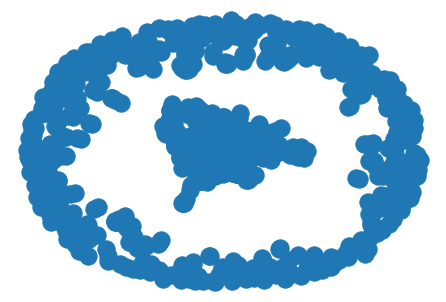

In [18]:
nx.draw(GW)

### Menghitung similarity antar tweet user

In [19]:
def cosine_sim(l1, l2, rvector):
    c = 0
    for i in range(len(rvector)):
        c+= l1[i]*l2[i]
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    return cosine

In [20]:
def text_sim(textA, textB):   
    X_set = ast.literal_eval(textA)
    Y_set = ast.literal_eval(textB)
    l1 =[];l2 =[]
    rvector = list(set(X_set) | set(Y_set))
    for w in rvector:
        if w in X_set: l1.append(1) # create a vector
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)    
    val = cosine_sim(l1, l2, rvector)
    return val

In [21]:
adj_list = [(n, nbrdict) for n, nbrdict in GW.adjacency()]
del adj_list[0] # remove nan
adj_list

[('iftarkult', {'secgron': {}}),
 ('pemalesan', {'remotivi': {}}),
 ('Briyanpace_', {}),
 ('Harmajano', {'mardiasih': {}}),
 ('hide0vs', {'aulianastiti': {}}),
 ('luluapr', {'BeckzJr7': {}}),
 ('sosmedzahra', {'mardiasih': {}}),
 ('tomashkereta', {'secgron': {}}),
 ('Jaya52102315', {'glembosisme': {}, 'mardiasih': {}, 'BaharrudinPrb12': {}}),
 ('Alva1588', {'M1_nusaputra': {}}),
 ('dmwsdq', {'edwin_basuki': {}, 'secgron': {}}),
 ('raynovtpg', {'secgron': {}}),
 ('Budi0315', {'mardiasih': {}}),
 ('AM_Assyifa', {'Trienk_03': {}, 'fahrisalam': {}}),
 ('kuciiir', {'mardiasih': {}}),
 ('bolonhuta1', {}),
 ('missjutek', {'remotivi': {}}),
 ('mere_twat',
  {'sediapulsa_': {},
   'yourlovelyboyy': {},
   'dinalativa': {},
   'jaywalkingg': {},
   'muchamadbashir': {}}),
 ('konotatif_', {'secgron': {}}),
 ('oedaykita', {'BeckzJr7': {}}),
 ('Jihan_alexa_ap', {}),
 ('skinnyfolk', {'CLina008': {}, 'malvin_siregar': {}}),
 ('harianja_marg', {'M1_nusaputra': {}}),
 ('juunsss', {'fullmoonfolks': {}})

In [22]:
cosine_df = pd.DataFrame(columns=['userA', 'userB', 'similarity'])
cosine_df

,userA,userB,similarity


In [50]:
for i in range(len(adj_list)):    
    userA = adj_list[i][0]    
    for key, v in adj_list[i][1].items():            
        textA = df[(df.from_user == userA) & (df.user_mentioned == key)].loc[:, 'text'].values
        textB = df[df.from_user == key].loc[:, 'text'].values
        if (len(textB) == 0) or (len(textA) == 0):
            sim_val = 0            
        else:                            
            sim_val = text_sim(textA[0], textB[0])
        new_row = {'userA': userA, 'userB': key, 'similarity': sim_val}
        cosine_df = cosine_df.append(new_row, ignore_index=True)

In [50]:
df[(df.from_user == 'remotivi')]

,from_user,text,in_reply_to_screen_name,user_mentioned
2424,remotivi,"['halo', 'polri', 'kl', 'mau', 'tunjuk', 'publ...",NaN,aulianastiti


In [52]:
a = df[(df.from_user == 'remotivi')].loc[:, 'text'].values
b = df[(df.from_user == 'fullmoonfolks')].loc[:, 'text'].values
text_sim(a[0], b[0])
a

array(["['halo', 'polri', 'kl', 'mau', 'tunjuk', 'publik', 'bhw', 'ga', 'perhati', 'baik2', 'pesan', 'ini', 'fokus', 'sama', 'tugas', 'tindak', 'perkosa', 'bukan', 'bungkam', 'media', 'pojok', 'korban']"],
      dtype=object)

In [23]:
# cosine_df.to_csv('tweet-#PercumaLaporPolisi-Cosine.csv', index=False)
cosine_df = pd.read_csv('tweet-#PercumaLaporPolisi-Cosine.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
cosine_df

,userA,userB,similarity
0,letsgodion,mawakresna,1.000000
1,Ndewek4,BaharrudinPrb12,0.000000
2,BayuBagustiaka2,libertees_id,0.707107
3,aryompme,aulianastiti,1.000000
4,aryompme,mardiasih,0.000000
...,...,...,...
4096,Dikapacman,secgron,1.000000
4097,dzqnabilah,sandhatu,0.377297
4098,hideousrockstar,remotivi,0.050252
4099,Anak_Pribum1,mardiasih,0.130435


In [25]:
# tambahkan weight ke setiap edge
for edge in GW.edges():
    userA = edge[0]
    userB = edge[1]    
    weight = cosine_df[(cosine_df.userA == userA) & (cosine_df.userB == userB)].loc[:,'similarity']    
    if len(weight) == 0:
        GW[userA][userB]['weight'] = 0
    else:
        GW[userA][userB]['weight'] = weight.iloc[0]

In [26]:
nx.get_edge_attributes(GW, 'weight')

{('iftarkult', 'secgron'): 1.0,
 ('pemalesan', 'remotivi'): 0.050251890762960605,
 ('Harmajano', 'mardiasih'): 0.0,
 ('hide0vs', 'aulianastiti'): 1.0,
 ('luluapr', 'BeckzJr7'): 1.0,
 ('sosmedzahra', 'mardiasih'): 0.13043478260869565,
 ('tomashkereta', 'secgron'): 1.0,
 ('Jaya52102315', 'glembosisme'): 1.0,
 ('Jaya52102315', 'mardiasih'): 0.0,
 ('Jaya52102315', 'BaharrudinPrb12'): 0.0,
 ('Alva1588', 'M1_nusaputra'): 0.0,
 ('dmwsdq', 'edwin_basuki'): 0.966091783079296,
 ('dmwsdq', 'secgron'): 1.0,
 ('raynovtpg', 'secgron'): 1.0,
 ('Budi0315', 'mardiasih'): 0.0,
 ('AM_Assyifa', 'Trienk_03'): 0.0,
 ('AM_Assyifa', 'fahrisalam'): 0.05337605126836238,
 ('kuciiir', 'mardiasih'): 0.0,
 ('missjutek', 'remotivi'): 0.050251890762960605,
 ('mere_twat', 'sediapulsa_'): 0.0,
 ('mere_twat', 'yourlovelyboyy'): 0.0,
 ('mere_twat', 'dinalativa'): 0.0,
 ('mere_twat', 'jaywalkingg'): 0.0,
 ('mere_twat', 'muchamadbashir'): 0.0,
 ('konotatif_', 'secgron'): 1.0,
 ('oedaykita', 'BeckzJr7'): 1.0,
 ('skinnyfolk'

## Deteksi Komunitas Menggunakan Louvain Method

In [27]:
import matplotlib.cm as cm

#### Undirected weighted graph

In [28]:
# compute the best partitionGW
partitionGW = community_louvain.best_partition(GW, random_state=1)

# # color the nodes according to their partitionGW
# cmap = cm.get_cmap('viridis', max(partitionGW.values()) + 1)
# nx.draw_networkx_nodes(GW, pos, partitionGW.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partitionGW.values()))
# nx.draw_networkx_edges(GW, pos, alpha=0.2)
# plt.show()

In [29]:
res = pd.DataFrame(partitionGW.items(), columns=['from_user', 'community'])
res

,from_user,community
0,NaN,0
1,iftarkult,1
2,pemalesan,2
3,Briyanpace_,3
4,Harmajano,4
...,...,...
2139,r3yn4_t4,1393
2140,adiscounthunter,1394
2141,tomick_,1395
2142,energetictree,1396


In [30]:
print(res.community.nunique())

1397


In [31]:
top5_list  = res.community.value_counts().index.to_list()[:5]
res.community.value_counts()

1      244
2      169
7       56
11      50
5       45
      ... 
481      1
483      1
485      1
487      1
0        1
Name: community, Length: 1397, dtype: int64

In [32]:
top5_list

[1, 2, 7, 11, 5]

In [33]:
res_merge = pd.merge(res,data[['from_user','text']],on='from_user', how='left')

In [34]:
comm_node_list = []
comm_edge_list = []
for i in range(5):
    comm_node_list.append(res[res.community == top5_list[i]].loc[:, 'from_user'].to_list())
    comm_edge_list.append([edge for edge in edge_list if (edge[0] in comm_node_list[i]) and (edge[1] in comm_node_list[i])])
len(comm_node_list)

5

In [35]:
# # draw the graph
pos = nx.spring_layout(GW)

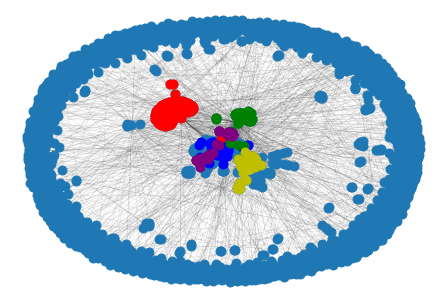

In [36]:
nx.draw(GW, pos, edge_color='k', node_size= 80, width= .05)

# memberi warna berbeda untuk 5 komunitas terbesar
fig = plt.figure(1, figsize=(12, 8))
nx.draw_networkx_nodes(GW, pos, nodelist=comm_node_list[0], node_color='b', node_size=80)
nx.draw_networkx_nodes(GW, pos, nodelist=comm_node_list[1], node_color='r', node_size=80)
nx.draw_networkx_nodes(GW, pos, nodelist=comm_node_list[2], node_color='g', node_size=80)
nx.draw_networkx_nodes(GW, pos, nodelist=comm_node_list[3], node_color='y', node_size=80)
nx.draw_networkx_nodes(GW, pos, nodelist=comm_node_list[4], node_color='purple', node_size=80)

### Komunitas terbesar ke-1

In [66]:
comm_graph = nx.Graph()
comm_graph.add_nodes_from(comm_node_list[0])
comm_graph.add_edges_from(comm_edge_list[0])
print("jumlah nodes:",comm_graph.number_of_nodes())
print("jumlah edges:",comm_graph.number_of_edges())

jumlah nodes: 285
jumlah edges: 284


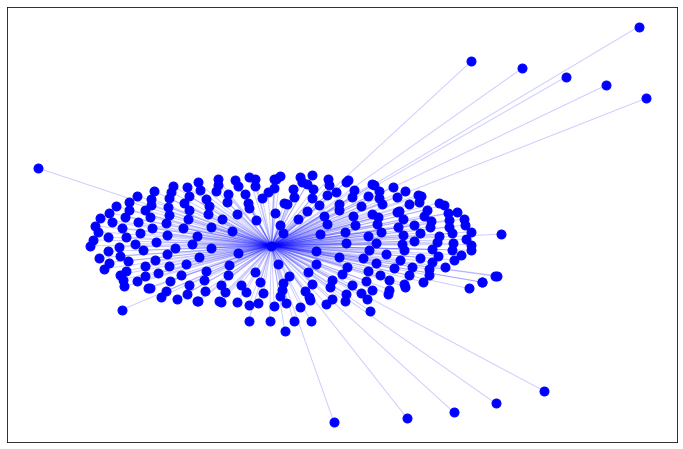

In [68]:
fig = plt.figure(1, figsize=(12, 8))
selected_node = [val for val,val in partitionGW.items() if val == top5_list[0]] 
nx.draw_networkx_nodes(comm_graph, pos, node_list=comm_node_list[0], node_color='b', node_size=80)
nx.draw_networkx_edges(comm_graph, pos, edgelist=comm_edge_list[0], alpha=.2, edge_color='b')

# nx.draw(comm_graph1, node_color=selected_node, cmap=cmap, with_labels=True, font_weight='normal', font_color='r', edge_alpha=.3)
plt.show()

In [69]:
res1 = res_merge[res_merge.community == top5_list[0]]
res1
a = res1.text.value_counts()
pd.DataFrame(a.items(), columns=['text', 'count'])

,text,count
0,RT @secgron: Bedain media dan web pribadi aja ...,273
1,RT @remotivi: Sepotong surat untuk polisi dari...,12
2,RT @secgron: Penipu : Halo kami dari blabla in...,10
3,"RT @erasmus70: Pak @M1_nusaputra , pernyataan ...",7
4,RT @mardiasih: #PolriSesuaiProsedur kalau mau ...,7
5,RT @audhinafh: This tweet is a perfect of embo...,3
6,RT @foeux: #PercumaLaporPolisi https://t.co/CQ...,3
7,RT @fullmoonfolks: Selalu #PercumaLaporPolisi ...,3
8,RT @ICJRid: Kita sama-sama ingatkan #PercumaL...,2
9,RT @brianstya: Iya kah #PercumaLaporPolisi kal...,2


### Komunitas terbesar ke-2

In [71]:
comm_graph = nx.Graph()
comm_graph.add_nodes_from(comm_node_list[1])
comm_graph.add_edges_from(comm_edge_list[1])
print("jumlah nodes:",comm_graph.number_of_nodes())
print("jumlah edges:",comm_graph.number_of_edges())

jumlah nodes: 147
jumlah edges: 155


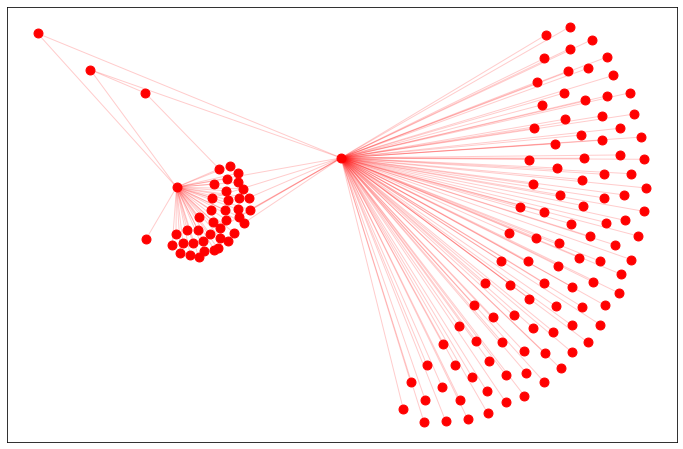

In [72]:
fig = plt.figure(1, figsize=(12, 8))
selected_node = [val for val,val in partitionGW.items() if val == top5_list[1]] 
nx.draw_networkx_nodes(comm_graph, pos, node_list=comm_node_list[1], node_color='r', node_size=80)
nx.draw_networkx_edges(comm_graph, pos, edgelist=comm_edge_list[1], alpha=.2, edge_color='r')

# nx.draw(comm_graph1, node_color=selected_node, cmap=cmap, with_labels=True, font_weight='normal', font_color='r', edge_alpha=.3)
plt.show()

In [73]:
res2 = res_merge[res_merge.community == top5_list[1]]
res2
a = res2.text.value_counts()
pd.DataFrame(a.items(), columns=['text', 'count'])

,text,count
0,RT @remotivi: Sepotong surat untuk polisi dari...,110
1,RT @aulianastiti: Halo @DivHumas_Polri kl mau ...,43
2,RT @mardiasih: #PolriSesuaiProsedur kalau mau ...,7
3,RT @TirtoID: #PercumaLaporPolisi seharusnya da...,2
4,RT @mardiasih: Ini bukan cuma tentang 3 anak p...,2
5,RT @foeux: #PercumaLaporPolisi https://t.co/CQ...,2
6,Nunggu viral dulu tagar #PercumaLaporPolisi ba...,1
7,"LSM Hak Asasi Manusia, Kontras mendorong kepol...",1
8,@KompasTV #PercumaLaporPolisi,1
9,"RT @erasmus70: Pak @M1_nusaputra , saya lampir...",1


### Komunitas terbesar ke-3

In [74]:
comm_graph = nx.Graph()
comm_graph.add_nodes_from(comm_node_list[2])
comm_graph.add_edges_from(comm_edge_list[2])
print("jumlah nodes:",comm_graph.number_of_nodes())
print("jumlah edges:",comm_graph.number_of_edges())

jumlah nodes: 73
jumlah edges: 73


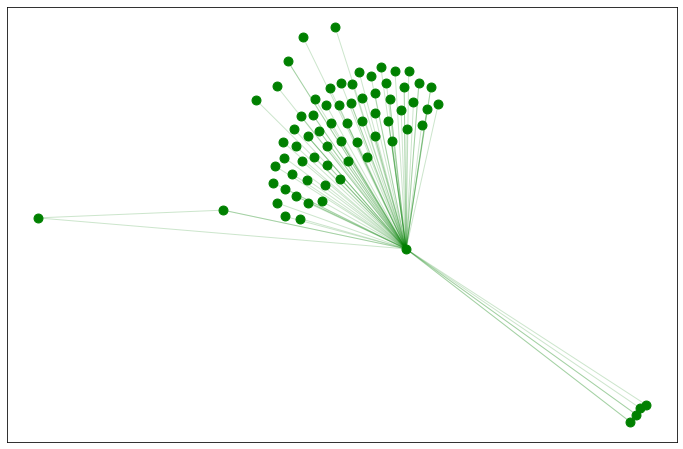

In [75]:
fig = plt.figure(1, figsize=(12, 8))
selected_node = [val for val,val in partitionGW.items() if val == top5_list[2]] 
nx.draw_networkx_nodes(comm_graph, pos, node_list=comm_node_list[2], node_color='g', node_size=80)
nx.draw_networkx_edges(comm_graph, pos, edgelist=comm_edge_list[2], alpha=.2, edge_color='g')

# nx.draw(comm_graph1, node_color=selected_node, cmap=cmap, with_labels=True, font_weight='normal', font_color='r', edge_alpha=.3)
plt.show()

In [76]:
res3 = res_merge[res_merge.community == top5_list[2]]
res3
a = res3.text.value_counts()
pd.DataFrame(a.items(), columns=['text', 'count'])

,text,count
0,RT @mardiasih: Ini bukan cuma tentang 3 anak p...,66
1,RT @mardiasih: #PolriSesuaiProsedur kalau mau ...,18
2,RT @remotivi: Sepotong surat untuk polisi dari...,5
3,RT @mardiasih: Biar nggak #PercumaLaporPolisi ...,2
4,@mardiasih Yang keluarga saya alami setelah ad...,1
5,@mardiasih Ngeliat responnya sich kayaknya ema...,1
6,RT @BaharrudinPrb12: Saling balas tagar #Percu...,1
7,Perang tagar. Tentu gue di pihak #PercumaLapor...,1
8,"@mardiasih Karena ini negara hukum, bukan nega...",1
9,@AldamDhani Ketika realita dibilang nyinyir 😅....,1


### Komunitas terbesar ke-4

In [77]:
comm_node_list4 = res[res.community == top5_list[3]].loc[:, 'from_user'].to_list()
comm_edge_list4 = [edge for edge in edge_list if (edge[0] in comm_node_list) and (edge[1] in comm_node_list)]

In [78]:
comm_graph = nx.Graph()
comm_graph.add_nodes_from(comm_node_list[3])
comm_graph.add_edges_from(comm_edge_list[3])
print("jumlah nodes:",comm_graph.number_of_nodes())
print("jumlah edges:",comm_graph.number_of_edges())

jumlah nodes: 73
jumlah edges: 72


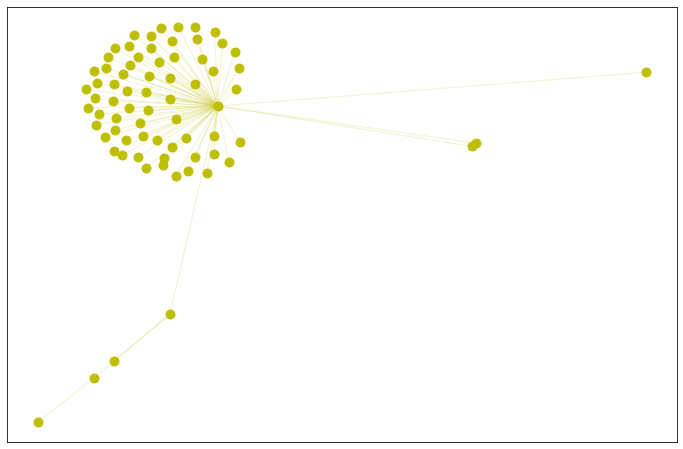

In [79]:
fig = plt.figure(1, figsize=(12, 8))
selected_node = [val for val,val in partitionGW.items() if val == top5_list[3]] 
nx.draw_networkx_nodes(comm_graph, pos, node_list=comm_node_list[3], node_color='y', node_size=80)
nx.draw_networkx_edges(comm_graph, pos, edgelist=comm_edge_list[3], alpha=.2, edge_color='y')

# nx.draw(comm_graph1, node_color=selected_node, cmap=cmap, with_labels=True, font_weight='normal', font_color='r', edge_alpha=.3)
plt.show()

In [37]:
res4 = res_merge[res_merge.community == top5_list[3]]
res4
a = res4.text.value_counts()
pd.DataFrame(a.items(), columns=['text', 'count'])

,text,count
0,RT @rivanlee: Semestinya #PercumaLaporPolisi i...,12
1,RT @auliaaherdiana: ikutan #PercumaLaporPolisi...,10
2,"RT @shifrunn: Trending #PercumaLaporPolisi, pa...",7
3,RT @libertees_id: Alasan kenapa #PercumaLaporP...,5
4,RT @sandhatu: #PercumaLaporPolisi (It's useles...,4
5,RT @projectm_org: PERINGATAN: Artikel ini meng...,4
6,RT @faridgaban: Anggaran Polri itu buat apa sa...,3
7,@mardiasih #PercumaLaporPolisi,3
8,RT @DersprotexAhmad: Hukum Macam Apa lagi ni.....,3
9,RT @triaaprr: Pacar saya motornya ilang bulan ...,3


### Komunitas terbesar ke-5

In [81]:
comm_graph = nx.Graph()
comm_graph.add_nodes_from(comm_node_list[4])
comm_graph.add_edges_from(comm_edge_list[4])
print("jumlah nodes:",comm_graph.number_of_nodes())
print("jumlah edges:",comm_graph.number_of_edges())

jumlah nodes: 68
jumlah edges: 73


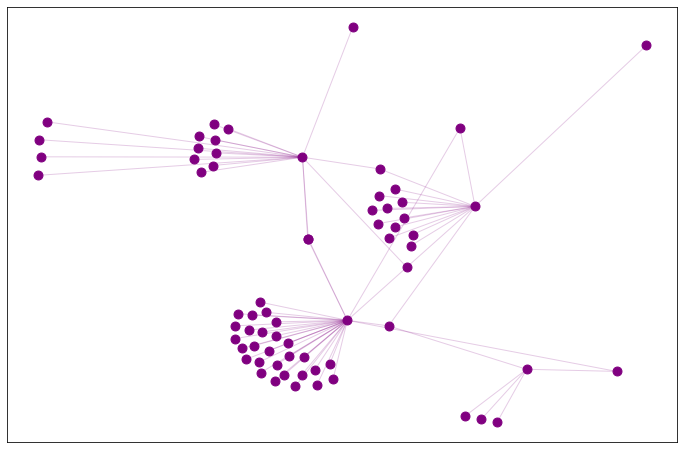

In [82]:
fig = plt.figure(1, figsize=(12, 8))
selected_node = [val for val,val in partitionGW.items() if val == top5_list[4]] 
nx.draw_networkx_nodes(comm_graph, pos, node_list=comm_node_list[4], node_color='purple', node_size=80)
nx.draw_networkx_edges(comm_graph, pos, edgelist=comm_edge_list[4], alpha=.2, edge_color='purple')

# nx.draw(comm_graph1, node_color=selected_node, cmap=cmap, with_labels=True, font_weight='normal', font_color='r', edge_alpha=.3)
plt.show()

In [84]:
res5 = res_merge[res_merge.community == top5_list[4]]
res5
a = res5.text.value_counts()
pd.DataFrame(a.items(), columns=['text', 'count'])

,text,count
0,RT @BeckzJr7: Lapor ke Damkar : Kartu ATM saya...,34
1,RT @triaaprr: Pacar saya motornya ilang bulan ...,16
2,RT @projectm_org: Pembaca yang terhormat.\n\nK...,14
3,RT @raviopatra: Saya\n• Diculik &amp; diperiks...,5
4,RT @projectm_org: PERINGATAN: Artikel ini meng...,4
5,RT @libertees_id: Alasan kenapa #PercumaLaporP...,4
6,RT @mardiasih: #PolriSesuaiProsedur kalau mau ...,2
7,RT @rivanlee: Semestinya #PercumaLaporPolisi i...,2
8,RT @fullmoonfolks: Selalu #PercumaLaporPolisi ...,1
9,RT @mardiasih: Ini bukan cuma tentang 3 anak p...,1
